# Energy Analysis
**Visualization and analysis of simulated building energy data**

* One of the biggest shopping mall of the world
* Located in United Arab Emirates (i.e. arid climate)
* Floor area is about 500,000 m2
* Number of visitors every year is around 90 million
* Building with tremendously high cooling energy demand

We will begin with visualizing some EnergyPlus simulation model data.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib

## Monthly Energy Visulization
Lets look at the energy consumption per month:
* The baseline data contains data from simulation model with conventional design options.

In [2]:
base_data = pd.read_csv('./simulation_data/Baseline.csv', index_col='Month')

In [3]:
base_data.head()

,Baseline
Month,
January,5.69
February,6.75
March,10.64
April,13.60
May,19.34


<Axes: xlabel='Month'>

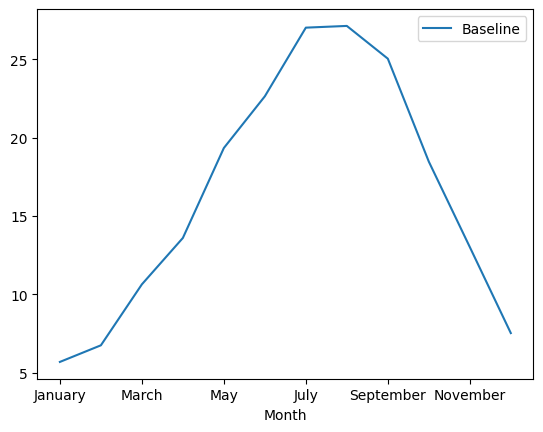

In [4]:
base_data.plot()

<Axes: title={'center': 'Cooling Energy Consumption of Baseline Building in Total GWh'}, xlabel='Month'>

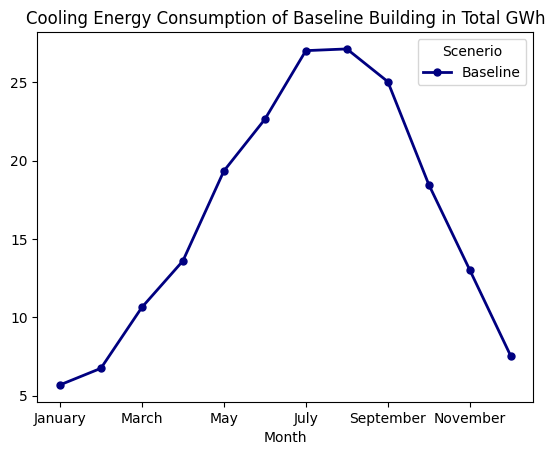

In [5]:
base_data.columns.name='Scenerio'
base_data.plot(lw=2, colormap='jet', marker='.', markersize=10, 
        title='Cooling Energy Consumption of Baseline Building in Total GWh')

## Different Design Options Scenerio
Baseline vs Different scheduling
* First let's take a look at one of the design options - the use of optimized schedules. Instead of the building operating 24/7, the building would have the cooling system on only during operating hours.

In [6]:
Aircon = pd.read_csv("./simulation_data/Scenario - Aircon Schedules.csv", index_col="Month")

In [7]:
Aircon

,Scenario - Aircon Schedules
Month,
January,5.61
February,6.50
March,9.70
April,11.95
May,16.52
June,18.89
July,22.13
August,22.14
September,20.38


In [8]:
base_data

Scenerio,Baseline
Month,
January,5.69
February,6.75
March,10.64
April,13.60
May,19.34
June,22.64
July,27.02
August,27.13
September,25.04


Combine both the dataset

In [9]:
combined_data = pd.concat([base_data, Aircon], axis=1)

In [10]:
combined_data

,Baseline,Scenario - Aircon Schedules
Month,,
January,5.69,5.61
February,6.75,6.50
March,10.64,9.70
April,13.60,11.95
May,19.34,16.52
June,22.64,18.89
July,27.02,22.13
August,27.13,22.14
September,25.04,20.38


<Axes: title={'center': 'Cooling Energy Consumption of Base Model in Total Gwh'}, xlabel='Month'>

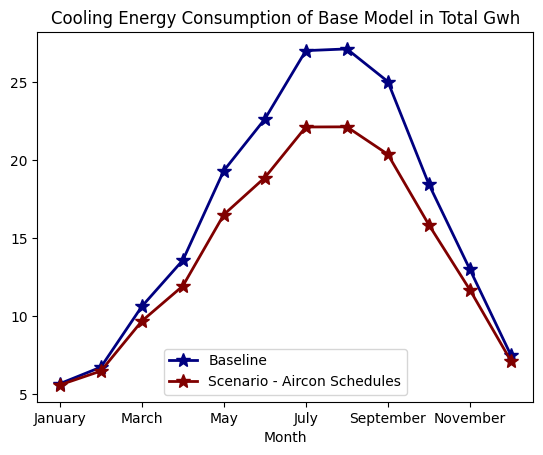

In [11]:
combined_data.plot(lw=2, colormap='jet', marker="*", markersize=10,
                  title="Cooling Energy Consumption of Base Model in Total Gwh")

In [12]:
combined_data['Difference'] = combined_data['Baseline'] - combined_data['Scenario - Aircon Schedules']

In [13]:
combined_data

,Baseline,Scenario - Aircon Schedules,Difference
Month,,,
January,5.69,5.61,0.08
February,6.75,6.50,0.25
March,10.64,9.70,0.94
April,13.60,11.95,1.65
May,19.34,16.52,2.82
June,22.64,18.89,3.75
July,27.02,22.13,4.89
August,27.13,22.14,4.99
September,25.04,20.38,4.66


<Axes: title={'center': 'Differene between base Schedule and Improved schedule in Total GWh'}, xlabel='Month'>

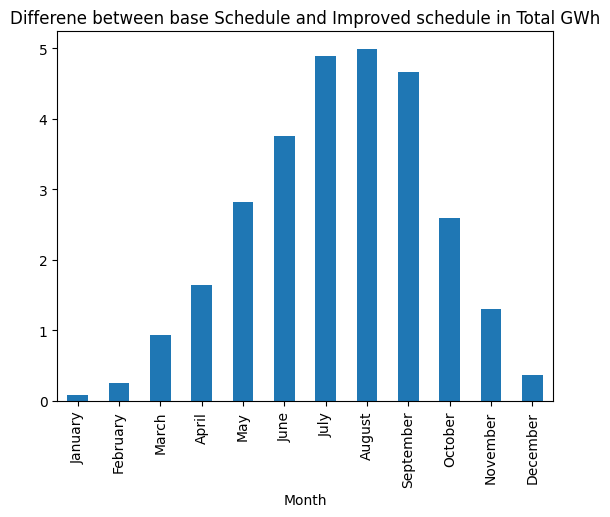

In [14]:
combined_data['Difference'].plot.bar(title='Differene between base Schedule and Improved schedule in Total GWh')

## Comparing all of the options
* Glazing
* Rooftop gardens
* Thermal Comfort
* Cool paiting on the roof

In [15]:
list_of_files = ['Scenario - Aircon Schedules.csv',
 'Scenario - Cool roof.csv',
 'Scenario - Rooftop Gardens.csv',
 'Scenario - Increase Setpoint.csv',
 'Scenario - Low-E Glass.csv',
 'Baseline.csv']

In [16]:
data_container = []
for file_name in list_of_files:
    df = pd.read_csv("./simulation_data/" + file_name, index_col='Month')
    data_container.append(df)
    
merged = pd.concat(data_container, axis=1)

In [17]:
merged

,Scenario - Aircon Schedules,Scenario - Cool roof,Scenario - Rooftop Gardens,Scenario - Increase Setpoint,Scenario - Low-E Glass,Baseline
Month,,,,,,
January,5.61,4.46,6.30,2.73,5.41,5.69
February,6.50,5.39,7.15,3.88,6.48,6.75
March,9.70,8.96,10.90,6.60,10.37,10.64
April,11.95,11.73,13.59,9.37,13.36,13.60
May,16.52,17.28,18.94,14.82,19.14,19.34
June,18.89,20.54,22.12,18.01,22.47,22.64
July,22.13,24.76,26.29,21.98,26.84,27.02
August,22.14,24.97,26.47,22.15,26.91,27.13
September,20.38,22.98,24.63,19.92,24.77,25.04


In [18]:
merged.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12 entries, January to December
Data columns (total 6 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Scenario - Aircon Schedules   12 non-null     float64
 1   Scenario - Cool roof          12 non-null     float64
 2   Scenario - Rooftop Gardens    12 non-null     float64
 3   Scenario - Increase Setpoint  12 non-null     float64
 4   Scenario - Low-E Glass        12 non-null     float64
 5   Baseline                      12 non-null     float64
dtypes: float64(6)
memory usage: 672.0+ bytes


<Axes: title={'center': 'Cooling Energy Consumption of Baseline Building in Total GWh'}, xlabel='Month'>

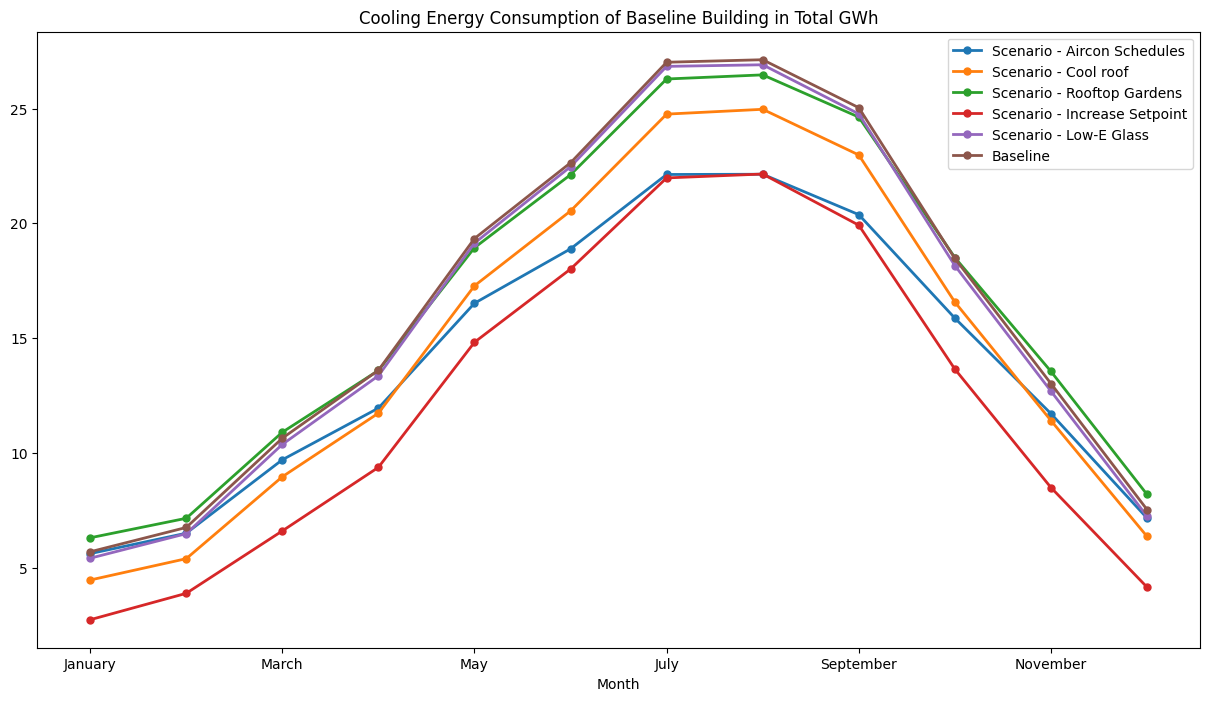

In [19]:
merged.plot(lw=2, marker='.', markersize=10, 
        title='Cooling Energy Consumption of Baseline Building in Total GWh', figsize=(15,8))

Lets see the total energy consumption reduction from each design options

In [20]:
merged

,Scenario - Aircon Schedules,Scenario - Cool roof,Scenario - Rooftop Gardens,Scenario - Increase Setpoint,Scenario - Low-E Glass,Baseline
Month,,,,,,
January,5.61,4.46,6.30,2.73,5.41,5.69
February,6.50,5.39,7.15,3.88,6.48,6.75
March,9.70,8.96,10.90,6.60,10.37,10.64
April,11.95,11.73,13.59,9.37,13.36,13.60
May,16.52,17.28,18.94,14.82,19.14,19.34
June,18.89,20.54,22.12,18.01,22.47,22.64
July,22.13,24.76,26.29,21.98,26.84,27.02
August,22.14,24.97,26.47,22.15,26.91,27.13
September,20.38,22.98,24.63,19.92,24.77,25.04


<Axes: >

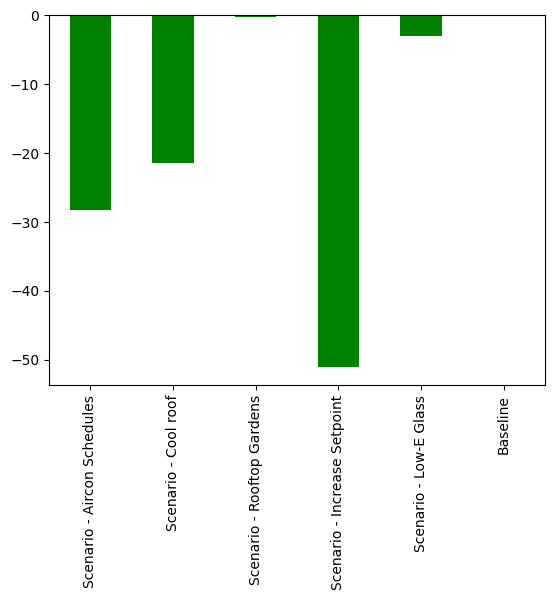

In [21]:
merged.subtract(merged['Baseline'], axis=0).sum().plot.bar(color='green')

# Time Series Data Analysis - Meter Data Analysis

Let's load the data from a single building for the meter_data folder- building name is Amelia

In [22]:
amelia = pd.read_csv('./meter_data/Office_Amelia.csv', index_col='timestamp')

In [23]:
amelia.head()

,Office_Amelia
timestamp,
2015-01-01 00:00:00,3.96
2015-01-01 01:00:00,4.44
2015-01-01 02:00:00,4.82
2015-01-01 03:00:00,4.28
2015-01-01 04:00:00,18.79


In [24]:
amelia.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8760 entries, 2015-01-01 00:00:00 to 2015-12-31 23:00:00
Data columns (total 1 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Office_Amelia  8760 non-null   float64
dtypes: float64(1)
memory usage: 136.9+ KB


In [25]:
amelia.index[0]

'2015-01-01 00:00:00'

### Convert  timestamp index to a datetime object

In [26]:
amelia = pd.read_csv('./meter_data/Office_Amelia.csv', index_col='timestamp', parse_dates=True)

In [27]:
amelia.head()

,Office_Amelia
timestamp,
2015-01-01 00:00:00,3.96
2015-01-01 01:00:00,4.44
2015-01-01 02:00:00,4.82
2015-01-01 03:00:00,4.28
2015-01-01 04:00:00,18.79


In [28]:
amelia.index[0]

Timestamp('2015-01-01 00:00:00')

Timestamp is the pandas equivalent of python's Datetime

### Plot Simple Charts of time-series data

<Axes: xlabel='timestamp'>

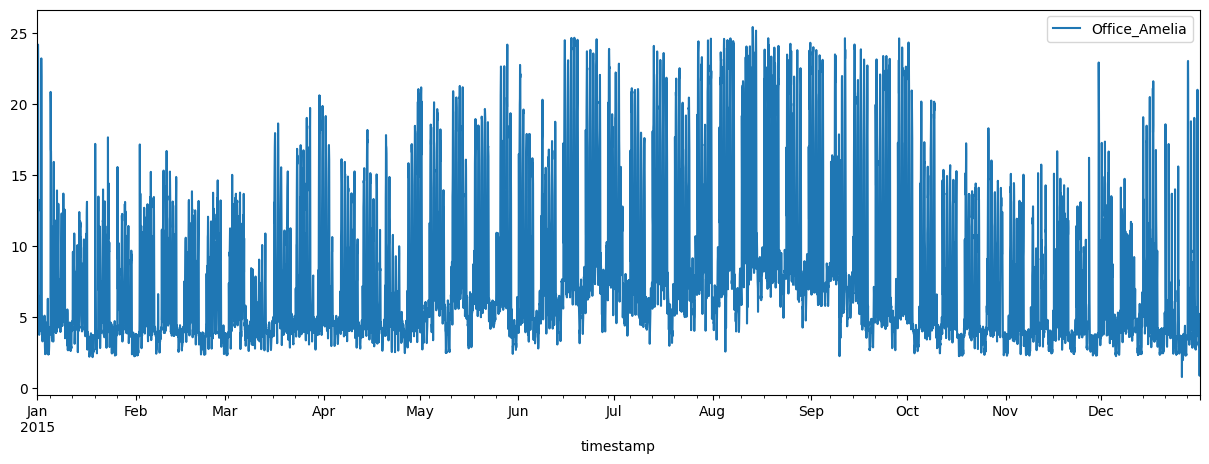

In [35]:
amelia.plot(figsize=(15, 5))

<Axes: xlabel='timestamp'>

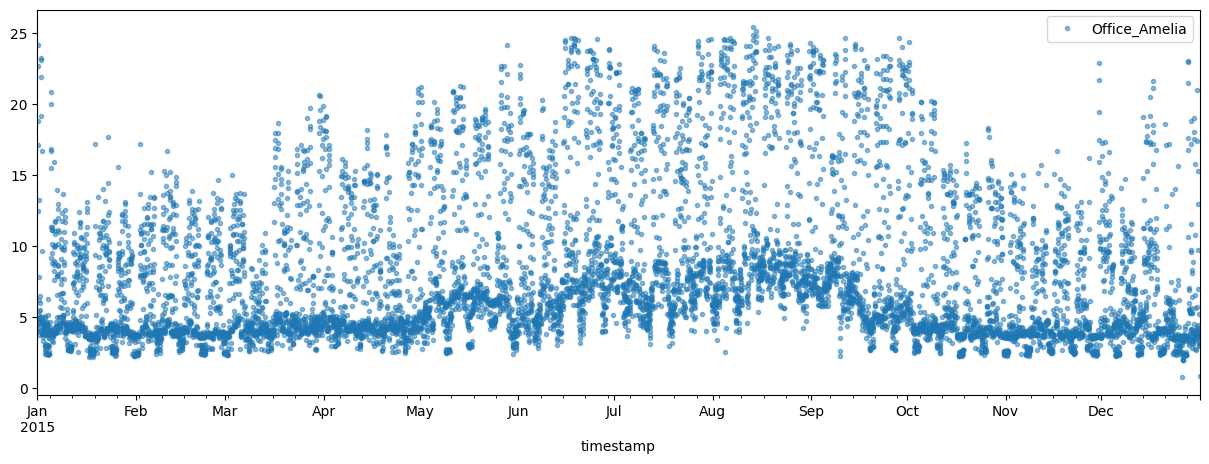

In [30]:
amelia.plot(marker=".", linestyle='None', alpha=0.5, figsize=(15, 5))

### Resample the data

Two types of resampling are: 
* Upsampling: Where you increase the frequency of the samples, such as from minutes to seconds. 
* Downsampling: Where you decrease the frequency of the samples, such as from days to months.

* We will focus here on downsampling, exploring how it can help us analyze our OPSD data on various time scales



In [36]:
amelia.head()

,Office_Amelia
timestamp,
2015-01-01 00:00:00,3.96
2015-01-01 01:00:00,4.44
2015-01-01 02:00:00,4.82
2015-01-01 03:00:00,4.28
2015-01-01 04:00:00,18.79


In [37]:
amelia_daily = amelia.resample("D").mean(numeric_only=True)

In [38]:
amelia_daily.head()

,Office_Amelia
timestamp,
2015-01-01,8.323750
2015-01-02,7.865417
2015-01-03,3.695417
2015-01-04,3.680417
2015-01-05,8.948333


<Axes: xlabel='timestamp'>

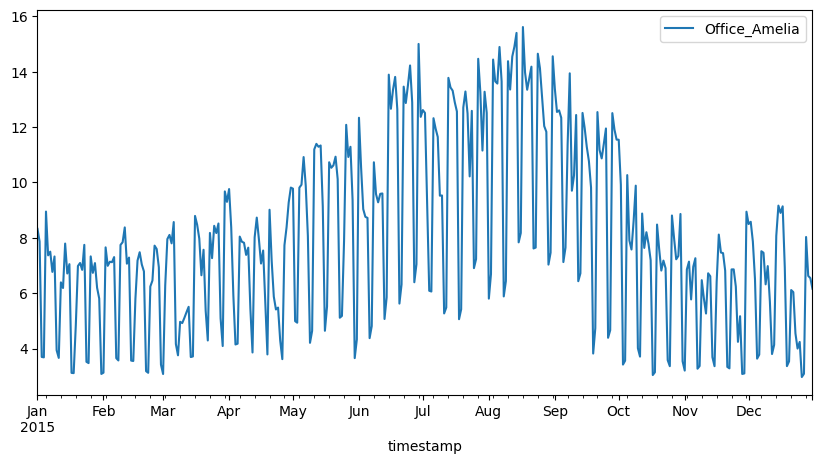

In [39]:
amelia_daily.plot(figsize=(10, 5))

C:\Users\kamal\AppData\Local\Temp\ipykernel_20308\576941219.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  amelia_daily.resample('M').mean().plot(figsize=(10, 5))


<Axes: xlabel='timestamp'>

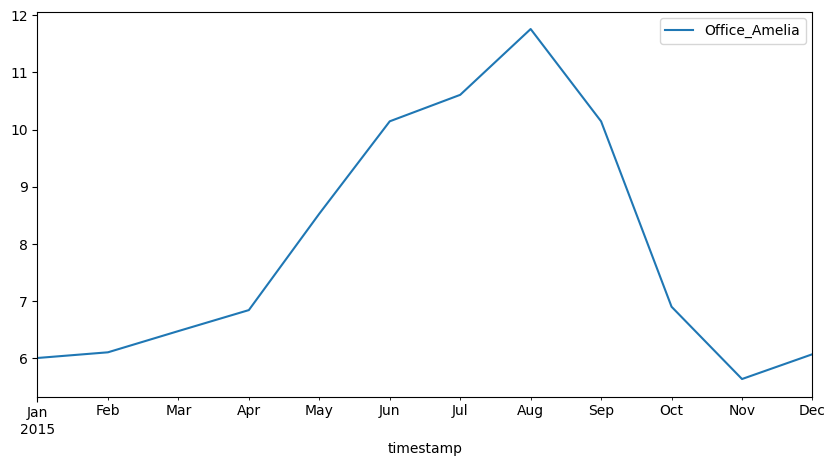

In [40]:
amelia_daily.resample('M').mean().plot(figsize=(10, 5))

### Analysis of a large number of buildings at once
we will select few for the building from the dataset

In [41]:
list_of_buildings = [
    'UnivClass_Andy.csv',
    'Office_Alannah.csv',
    'PrimClass_Angel.csv',
    'Office_Penny.csv',
    'UnivLab_Allison.csv',
    'Office_Amelia.csv',
    'UnivClass_Alfredo.csv',
    'Office_Phebian.csv',
    'UnivLab_Adrian.csv',
    'UnivDorm_Curtis.csv',
    'UnivLab_Angie.csv',
    'UnivClass_Amya.csv',
    'UnivLab_Audra.csv',
]

In [42]:
data_container_list = []
for building_name in list_of_buildings:
    df = pd.read_csv("./meter_data/" + building_name, index_col='timestamp', parse_dates=True)
    df = df.resample("D").mean()
    data_container_list.append(df)
all_merged = pd.concat(data_container_list, axis=1)

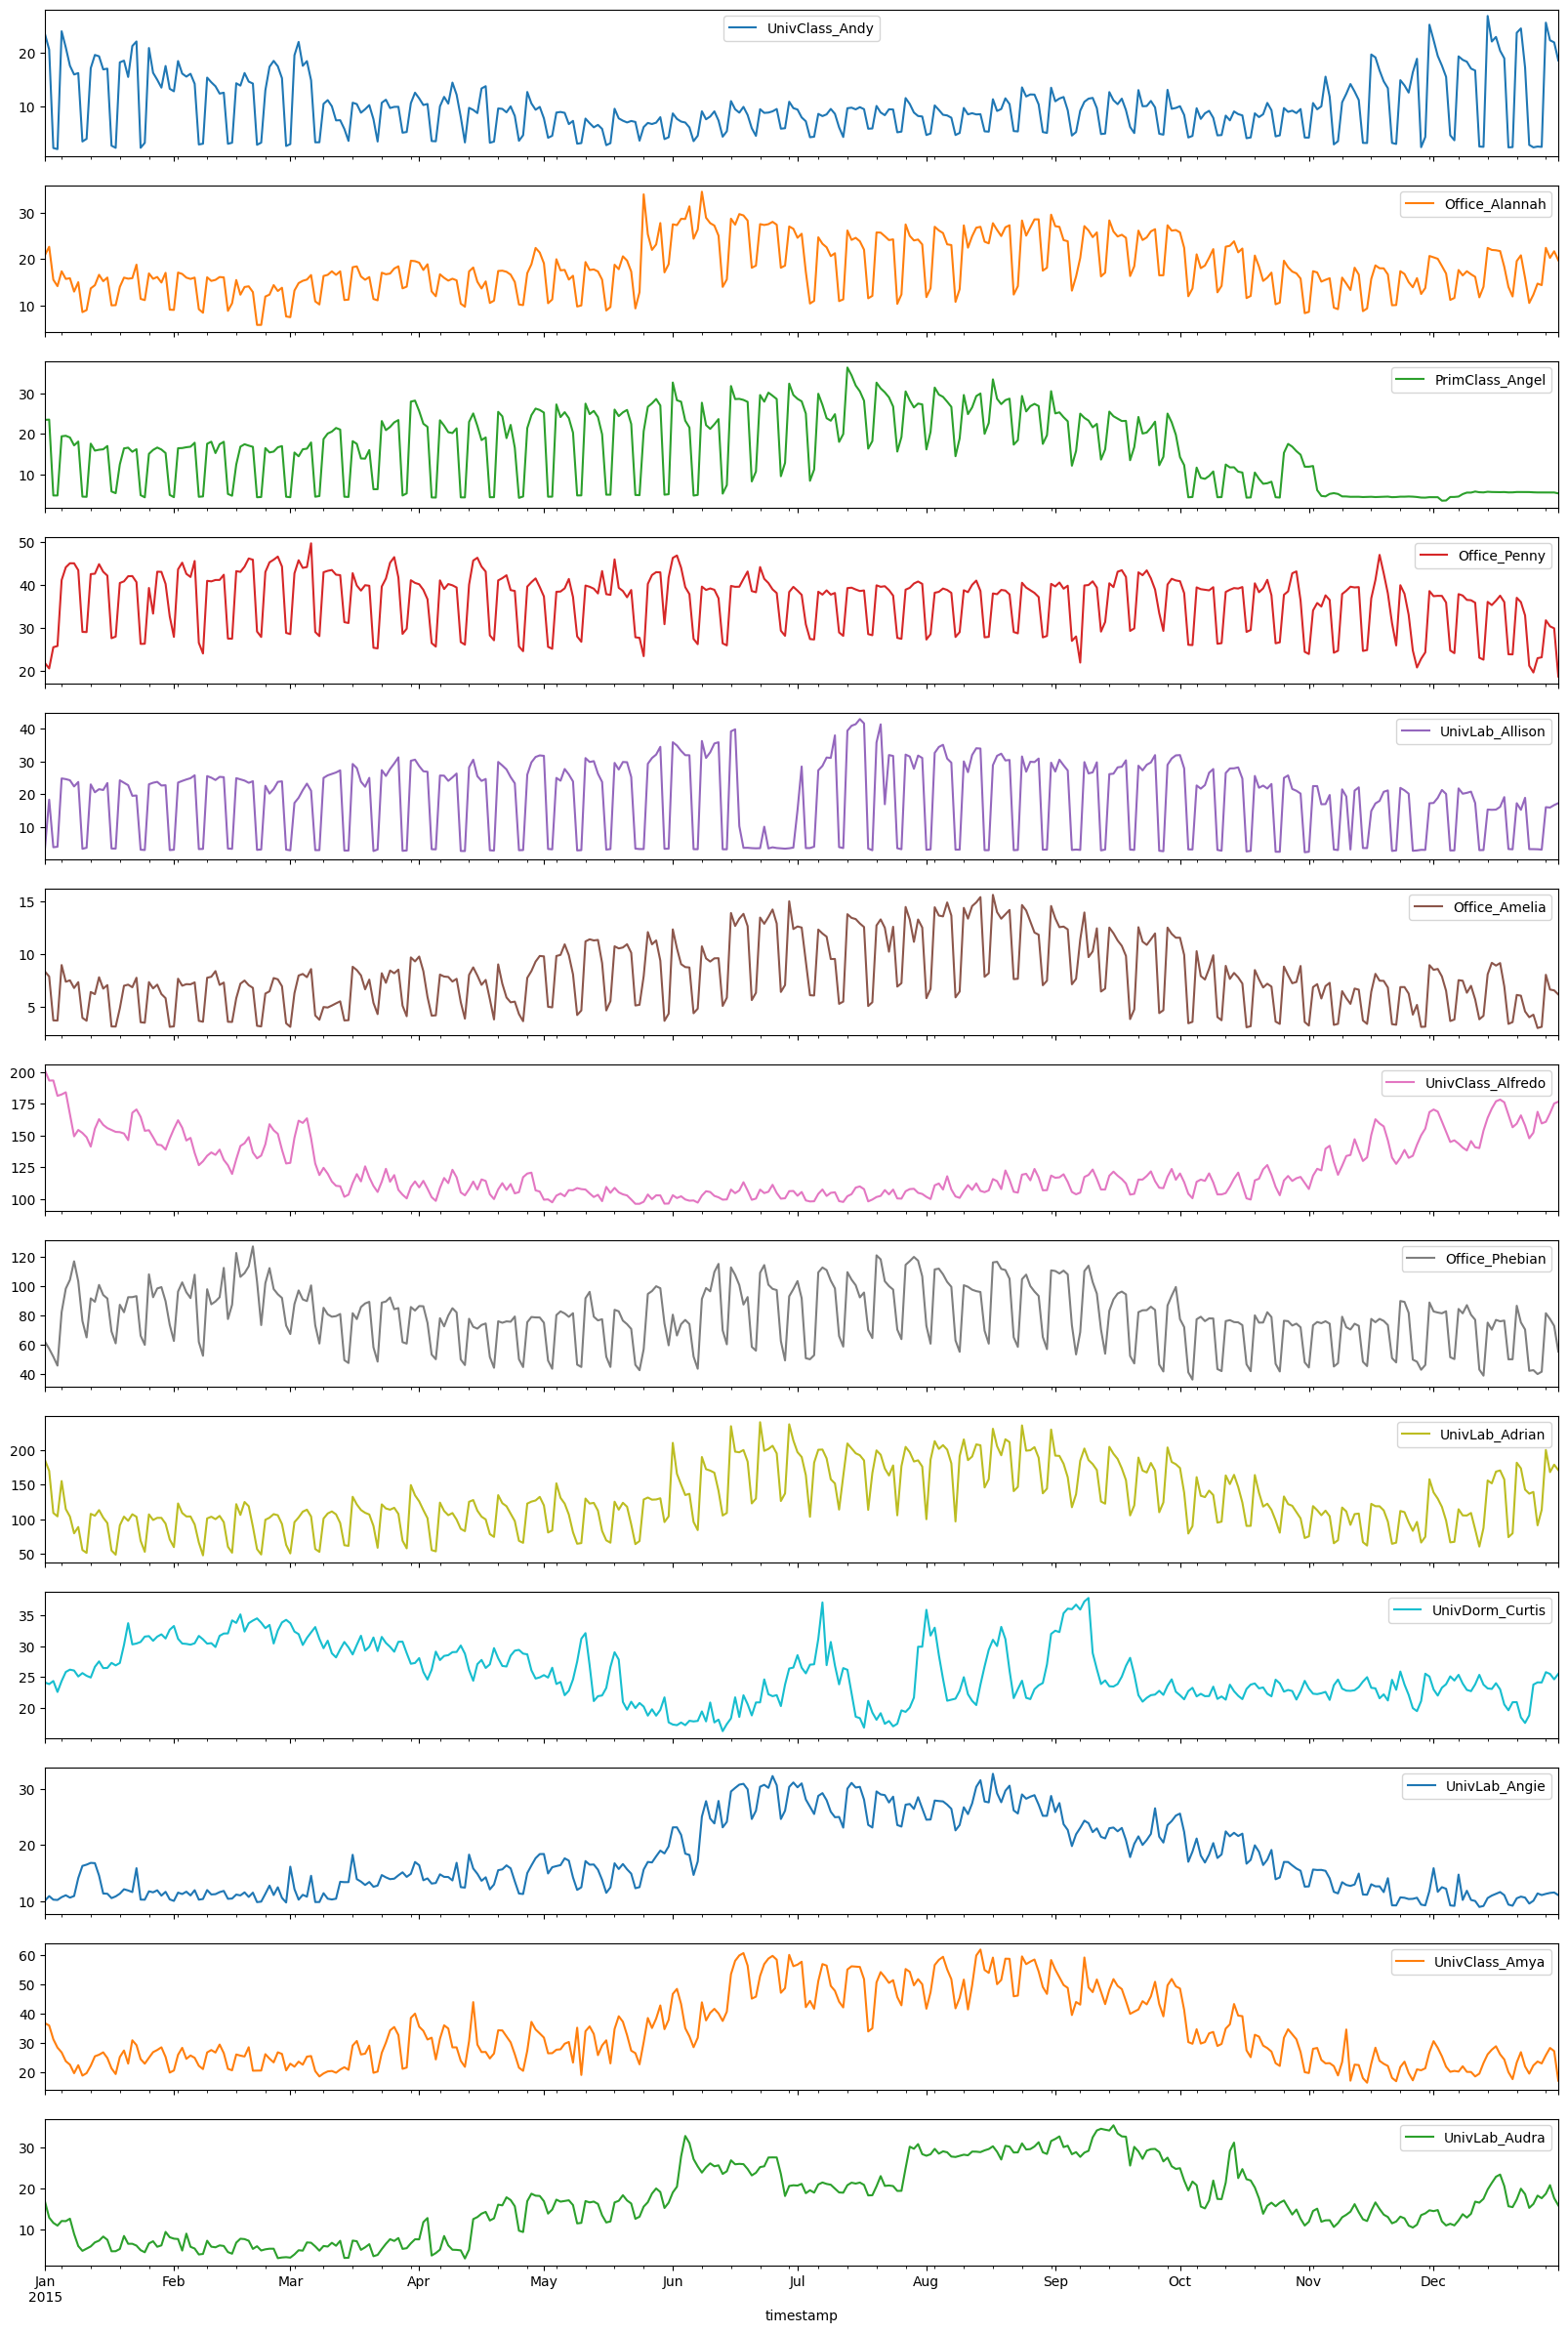

In [44]:
all_merged.plot(figsize=(20, 30), subplots=True);

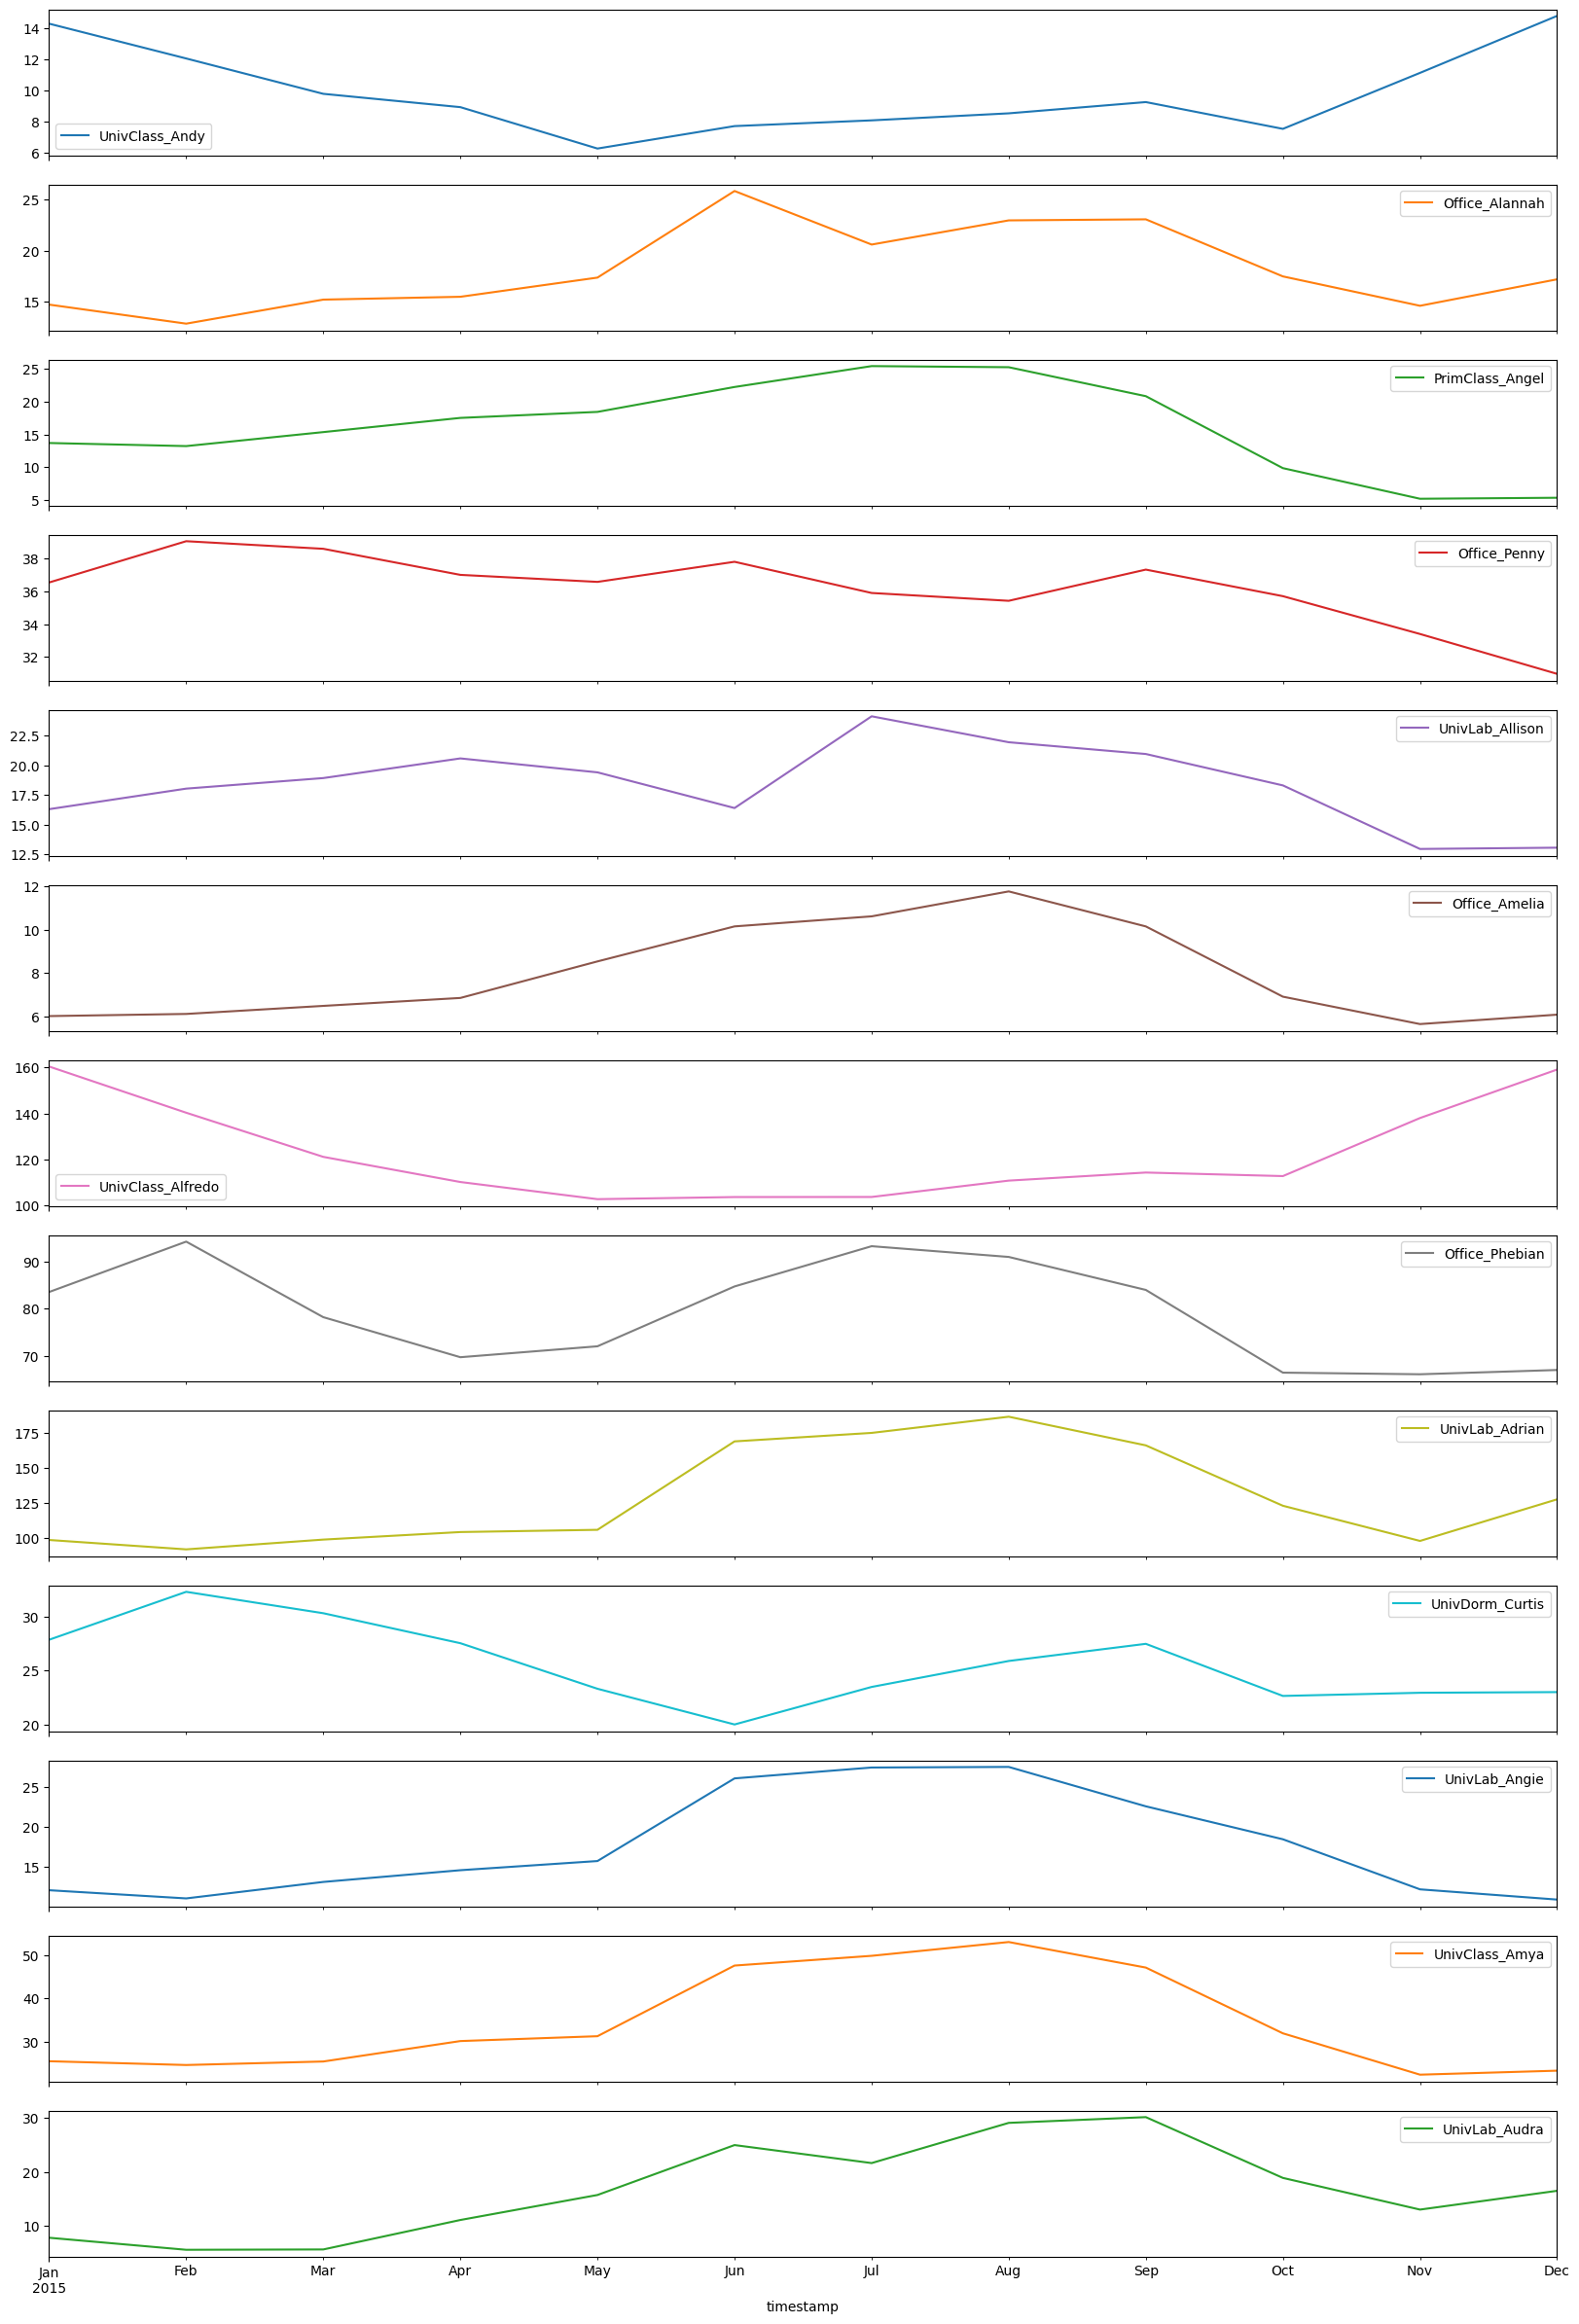

In [46]:
all_merged.resample("ME").mean().plot(figsize=(20,30), subplots=True);

# Compare consumption of buildings to be  each other

* Buildings come in all shapes, sizes and uses. It is difficult to compare the energy consumption of two buildings if they are not similar in these ways 
* So we will Normalize energy consumption data of buildings to be able to compare them to each other¶

In [47]:
# Here we will take different building
building_name = "Office_Amelia"
raw_data = pd.read_csv("./meter_data/"+building_name+".csv", parse_dates=True, index_col='timestamp')

In [48]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 8760 entries, 2015-01-01 00:00:00 to 2015-12-31 23:00:00
Data columns (total 1 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Office_Amelia  8760 non-null   float64
dtypes: float64(1)
memory usage: 136.9 KB


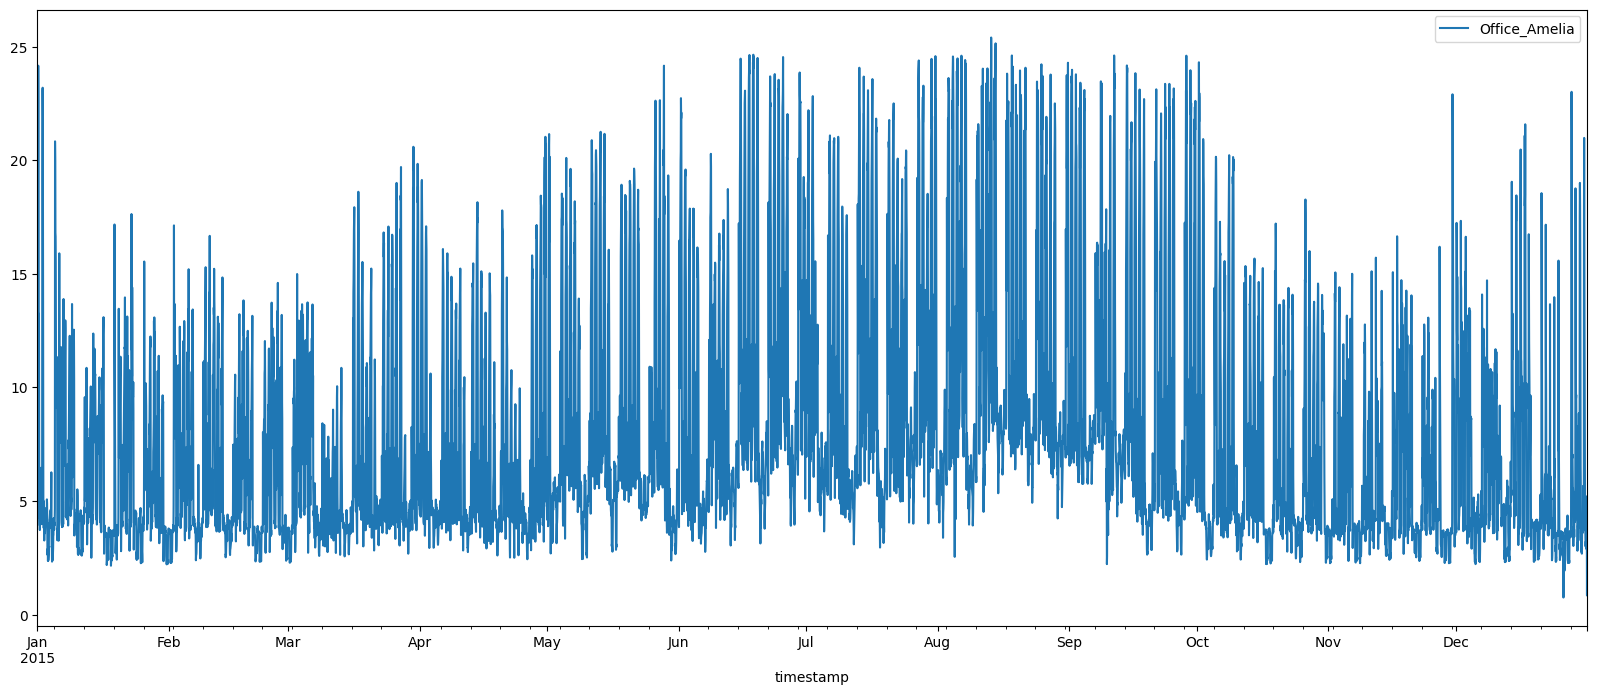

In [50]:
raw_data.plot(figsize=(20, 8));

### Normalize by floor area
* EUI - Energy Use Intensity - This metric takes energy and simply divides by the floor area (in ft2 or m2)

In [51]:
metadata = pd.read_csv('./all_buildings_meta_data.csv', index_col="uid")

In [52]:
metadata.head()

,dataend,datastart,energystarscore,heatingtype,industry,mainheatingtype,numberoffloors,occupants,primaryspaceusage,rating,sqft,sqm,subindustry,timezone,yearbuilt,nickname,primaryspaceuse_abbrev,newweatherfilename
uid,,,,,,,,,,,,,,,,,,
PrimClass_Everett,31/12/12 23:00,01/01/12 00:00,NaN,NaN,Education,NaN,NaN,NaN,Primary/Secondary Classroom,NaN,105530.0,9804.053590,Primary/Secondary School,America/New_York,NaN,Everett,PrimClass,weather12.csv
UnivClass_Clifford,31/12/15 23:00,01/01/15 00:00,NaN,NaN,Education,NaN,NaN,NaN,College Classroom,NaN,56969.0,5292.591007,College/University,America/New_York,1967,Clifford,UnivClass,weather2.csv
Office_Elizabeth,31/12/12 23:00,01/01/12 00:00,NaN,NaN,Commercial Property,NaN,NaN,NaN,Office,NaN,294651.0,27373.961850,Commercial Real Estate,America/Los_Angeles,NaN,Elizabeth,Office,weather22.csv
Office_Ellie,31/12/12 23:00,01/01/12 00:00,NaN,NaN,Commercial Property,NaN,NaN,NaN,Office,NaN,496517.0,46127.918850,Bank/Financial Services,America/Los_Angeles,NaN,Ellie,Office,weather28.csv
PrimClass_Elisabeth,31/12/12 23:00,01/01/12 00:00,NaN,NaN,Education,NaN,NaN,NaN,Primary/Secondary Classroom,NaN,233062.0,21652.158990,Primary/Secondary School,America/New_York,NaN,Elisabeth,PrimClass,weather23.csv


In [53]:
metadata.loc[building_name]

dataend                       31/12/15 23:00
datastart                     01/01/15 00:00
energystarscore                          NaN
heatingtype                              NaN
industry                           Education
mainheatingtype                          NaN
numberoffloors                           NaN
occupants                                NaN
primaryspaceusage                     Office
rating                                   NaN
sqft                                  6203.0
sqm                               576.277309
subindustry               College/University
timezone                     America/Phoenix
yearbuilt                               1999
nickname                              Amelia
primaryspaceuse_abbrev                Office
newweatherfilename              weather0.csv
Name: Office_Amelia, dtype: object

In [54]:
sqm = metadata.loc[building_name]["sqm"]
sqm

576.277309

In [55]:
raw_data.head()

,Office_Amelia
timestamp,
2015-01-01 00:00:00,3.96
2015-01-01 01:00:00,4.44
2015-01-01 02:00:00,4.82
2015-01-01 03:00:00,4.28
2015-01-01 04:00:00,18.79


In [56]:
normazlied_rawdata = raw_data / sqm

In [57]:
normazlied_rawdata.head()

,Office_Amelia
timestamp,
2015-01-01 00:00:00,0.006872
2015-01-01 01:00:00,0.007705
2015-01-01 02:00:00,0.008364
2015-01-01 03:00:00,0.007427
2015-01-01 04:00:00,0.032606


In [59]:
monthly_normalized = normazlied_rawdata.resample('ME').sum()

Text(0, 0.5, 'Kwh/m2')

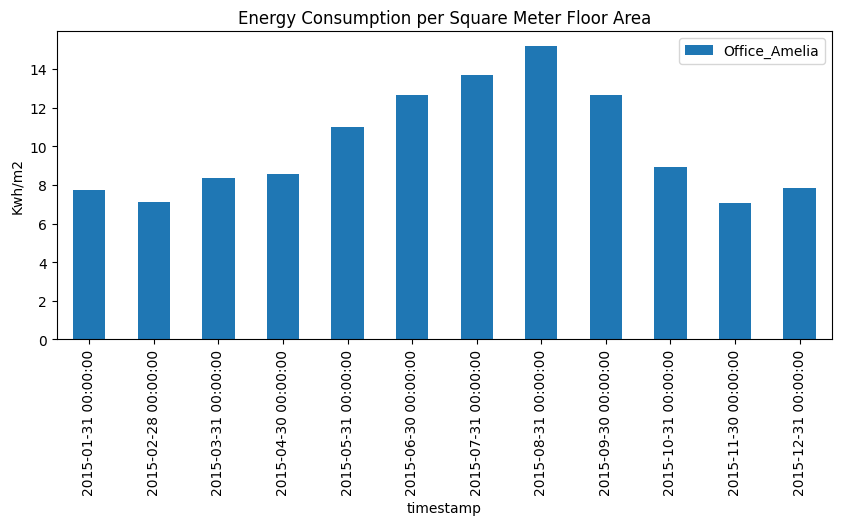

In [60]:
monthly_normalized.plot(kind="bar", figsize=(10,4), title='Energy Consumption per Square Meter Floor Area')
plt.ylabel("Kwh/m2")

### Analysis on multiple buildings¶

In [61]:
buildingnamelist = [
    "Office_Abbey",
    "Office_Pam",
    "Office_Penny",
    "UnivLab_Allison",
    "UnivLab_Audra",
    "UnivLab_Ciel"]

In [62]:
annual_data_list = []
annual_data_list_normalized = []

In [63]:
for buildingname in buildingnamelist:
    print("Getting data from: "+buildingname)
    
    rawdata = pd.read_csv("./meter_data/"+buildingname+".csv", parse_dates=True, index_col='timestamp')
    floor_area = metadata.loc[buildingname]["sqm"]
    
    annual = rawdata.sum()

    normalized_data = rawdata/floor_area
    annual_normalized = normalized_data.sum()
    
    annual_data_list_normalized.append(annual_normalized)
    annual_data_list.append(annual) 

Getting data from: Office_Abbey
Getting data from: Office_Pam
Getting data from: Office_Penny
Getting data from: UnivLab_Allison
Getting data from: UnivLab_Audra
Getting data from: UnivLab_Ciel


In [64]:
totaldata = pd.concat(annual_data_list)
totaldata_normalized = pd.concat(annual_data_list_normalized)

In [65]:
totaldata

Office_Abbey       4.500047e+05
Office_Pam         9.239849e+05
Office_Penny       3.167204e+05
UnivLab_Allison    1.614309e+05
UnivLab_Audra      1.466867e+05
UnivLab_Ciel       3.122984e+06
dtype: float64

In [66]:
totaldata_normalized

Office_Abbey        65.298087
Office_Pam          95.022257
Office_Penny        90.947091
UnivLab_Allison    370.575397
UnivLab_Audra      344.517297
UnivLab_Ciel       143.740305
dtype: float64

#### Unnormalized energy consumption
see from the annual totals of energy consumption, the Lab named Ciel uses a lot of energy as compared to the other buildings!

<Axes: >

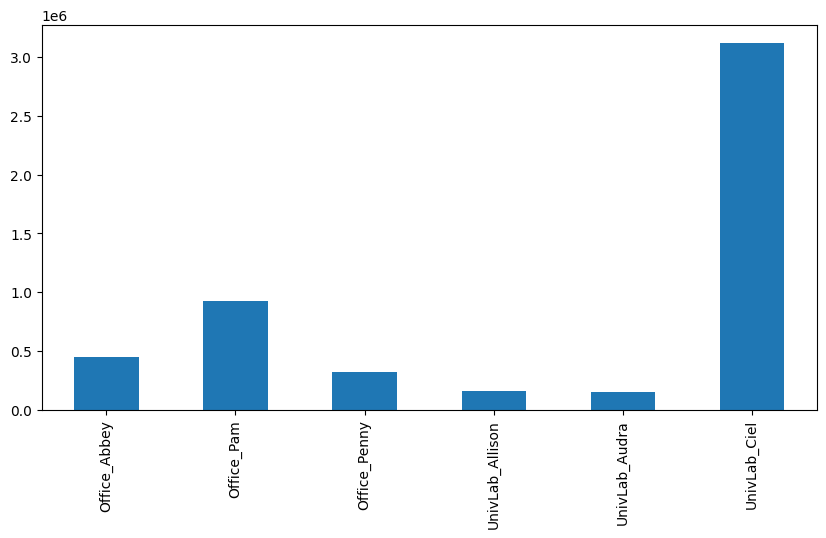

In [67]:
totaldata.plot(kind='bar',figsize=(10,5))

#### Normalized Energy Consumption
But, when normalized using floor area, Ciel is not the highest consumer

<Axes: >

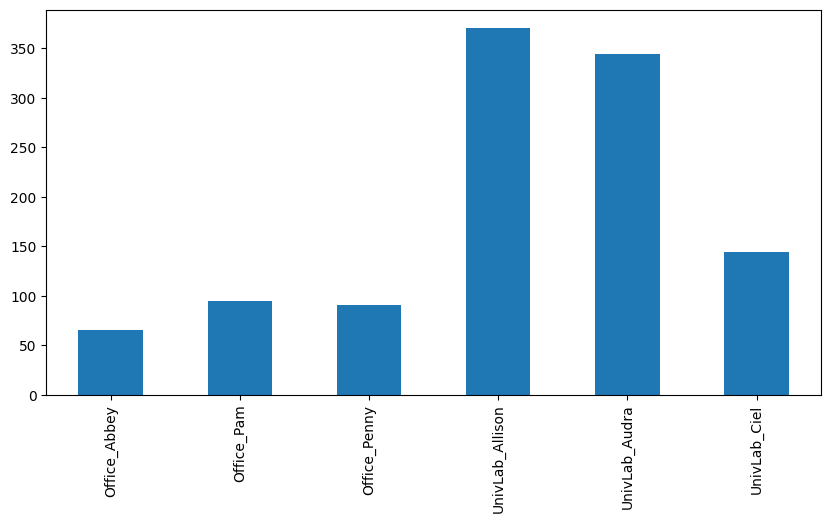

In [68]:
totaldata_normalized.plot(kind='bar',figsize=(10,5))

# Weather Influence on Energy Consumption

In [69]:
%matplotlib inline

In [70]:
ciara_rawdata = pd.read_csv("./meter_data/office_Amelia.csv", parse_dates=True, index_col='timestamp')

In [71]:
ciara_rawdata.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 8760 entries, 2015-01-01 00:00:00 to 2015-12-31 23:00:00
Data columns (total 1 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Office_Amelia  8760 non-null   float64
dtypes: float64(1)
memory usage: 136.9 KB


<Axes: xlabel='timestamp'>

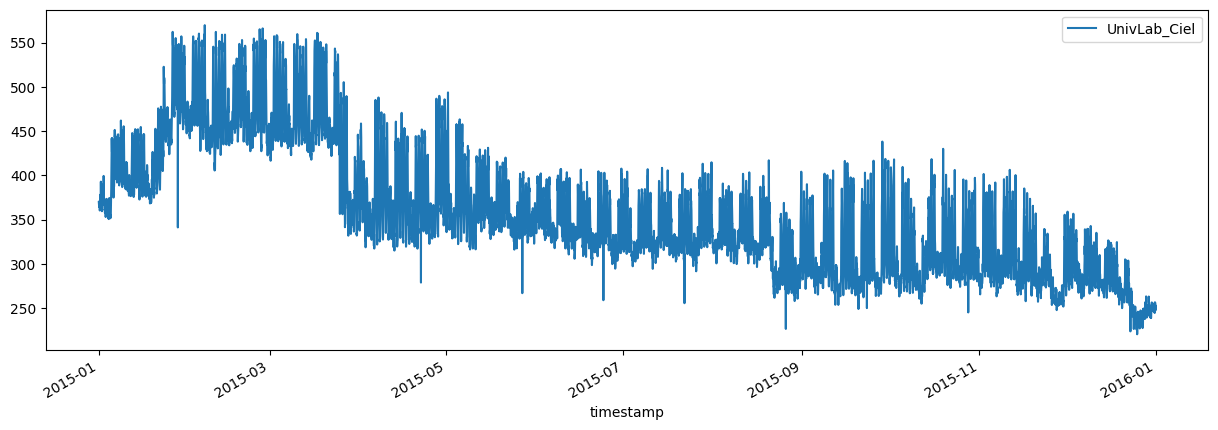

In [73]:
rawdata.plot(figsize=(15,5))

In [75]:
metadata.loc['Office_Amelia']

dataend                       31/12/15 23:00
datastart                     01/01/15 00:00
energystarscore                          NaN
heatingtype                              NaN
industry                           Education
mainheatingtype                          NaN
numberoffloors                           NaN
occupants                                NaN
primaryspaceusage                     Office
rating                                   NaN
sqft                                  6203.0
sqm                               576.277309
subindustry               College/University
timezone                     America/Phoenix
yearbuilt                               1999
nickname                              Amelia
primaryspaceuse_abbrev                Office
newweatherfilename              weather0.csv
Name: Office_Amelia, dtype: object

For the university class building "UnivClass_Ciara" the weather data is weather2.csv as we can see from the meta data.

In [76]:
weather_data_ciara = pd.read_csv("./weather_data/weather2.csv", index_col='timestamp', parse_dates=True)

In [77]:
weather_data_ciara.head()

,Conditions,DateUTC<br />,Dew PointC,Events,Gust SpeedKm/h,Humidity,Precipitationmm,Sea Level PressurehPa,TemperatureC,TimeEDT,TimeEST,VisibilityKm,Wind Direction,Wind SpeedKm/h,WindDirDegrees,timestamp.1
timestamp,,,,,,,,,,,,,,,,
2015-01-01 00:56:00,Overcast,2015-01-01 05:56:00<br />,-15.0,NaN,-,54.0,NaN,1017.4,-7.2,NaN,12:56 AM,16.1,SW,18.5,230,2015-01-01 00:56:00
2015-01-01 01:56:00,Overcast,2015-01-01 06:56:00<br />,-14.4,NaN,-,55.0,NaN,1017.2,-6.6,NaN,1:56 AM,16.1,WSW,14.8,240,2015-01-01 01:56:00
2015-01-01 02:56:00,Overcast,2015-01-01 07:56:00<br />,-14.4,NaN,-,55.0,NaN,1016.9,-6.6,NaN,2:56 AM,16.1,SW,14.8,220,2015-01-01 02:56:00
2015-01-01 03:56:00,Overcast,2015-01-01 08:56:00<br />,-14.4,NaN,-,55.0,NaN,1017.2,-6.6,NaN,3:56 AM,16.1,SW,18.5,220,2015-01-01 03:56:00
2015-01-01 04:56:00,Overcast,2015-01-01 09:56:00<br />,-14.4,NaN,-,55.0,NaN,1017.2,-6.6,NaN,4:56 AM,16.1,SSW,14.8,210,2015-01-01 04:56:00


In [78]:
weather_data_ciara.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 10914 entries, 2015-01-01 00:56:00 to 2015-12-31 21:56:00
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Conditions             10914 non-null  object 
 1   DateUTC<br />          10914 non-null  object 
 2   Dew PointC             10914 non-null  float64
 3   Events                 2555 non-null   object 
 4   Gust SpeedKm/h         10914 non-null  object 
 5   Humidity               10878 non-null  float64
 6   Precipitationmm        2945 non-null   float64
 7   Sea Level PressurehPa  10914 non-null  float64
 8   TemperatureC           10914 non-null  float64
 9   TimeEDT                7104 non-null   object 
 10  TimeEST                3810 non-null   object 
 11  VisibilityKm           10914 non-null  float64
 12  Wind Direction         10914 non-null  object 
 13  Wind SpeedKm/h         10914 non-null  object 
 14  WindDirDegrees     

<Axes: xlabel='timestamp'>

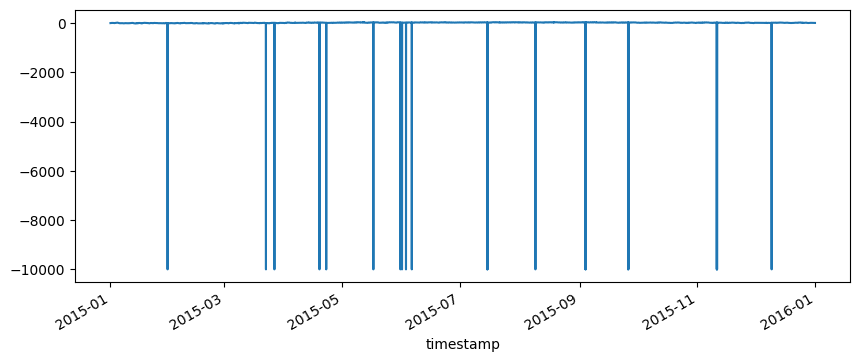

In [79]:
weather_data_ciara['TemperatureC'].plot(figsize=(10, 4))

Looks like there are outliers in the dataset where some reading are very unlikely with temperature reaching 10,000 Deg C.

In [82]:
weather_hourly = weather_data_ciara.resample('h').mean(numeric_only=True)

In [83]:
weather_hourly_nooutlier = weather_hourly[weather_hourly > -40]

In [84]:
weather_hourly['TemperatureC'].info()

<class 'pandas.core.series.Series'>
DatetimeIndex: 8758 entries, 2015-01-01 00:00:00 to 2015-12-31 21:00:00
Freq: h
Series name: TemperatureC
Non-Null Count  Dtype  
--------------  -----  
8567 non-null   float64
dtypes: float64(1)
memory usage: 136.8 KB


In [85]:
weather_hourly_nooutlier['TemperatureC'].info()

<class 'pandas.core.series.Series'>
DatetimeIndex: 8758 entries, 2015-01-01 00:00:00 to 2015-12-31 21:00:00
Freq: h
Series name: TemperatureC
Non-Null Count  Dtype  
--------------  -----  
8544 non-null   float64
dtypes: float64(1)
memory usage: 136.8 KB


<Axes: xlabel='timestamp'>

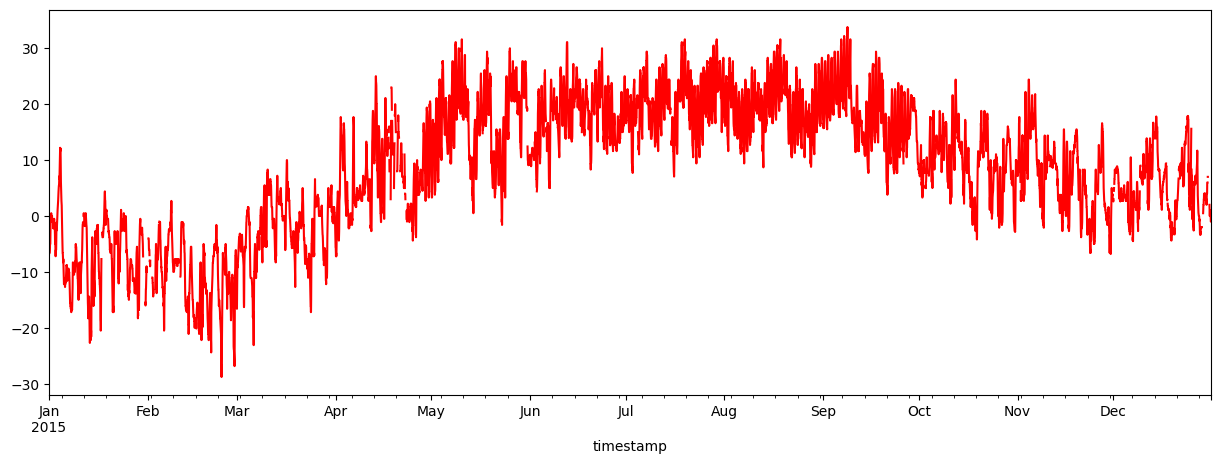

In [87]:
weather_hourly_nooutlier['TemperatureC'].plot(figsize=(15, 5), color='red')

### Filling gaps in data

We can fill the gap left by filtering the outliers by using the `.fillna()` function

In [89]:
weather_nooutlier_nogaps = weather_hourly_nooutlier.ffill()

<Axes: xlabel='timestamp'>

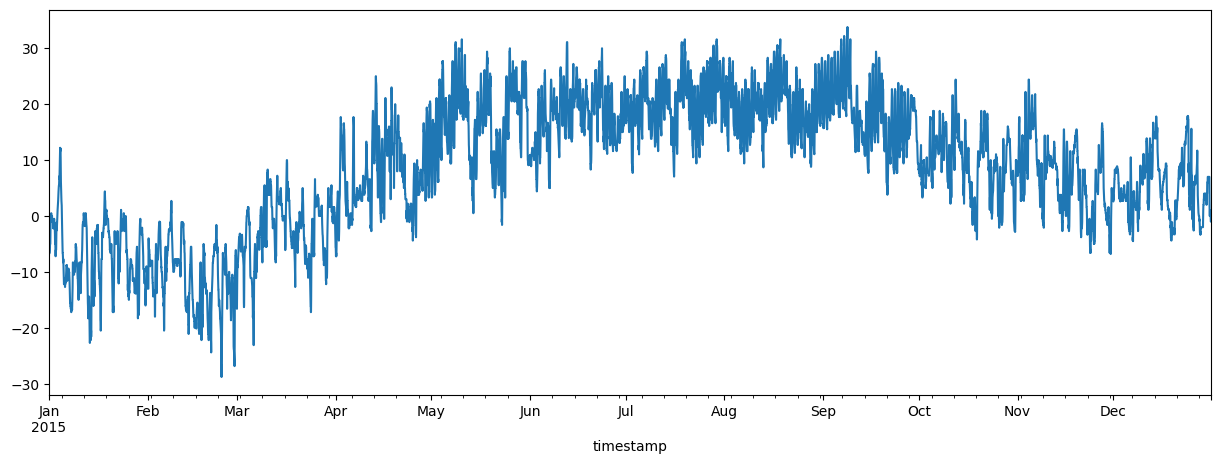

In [90]:
weather_nooutlier_nogaps["TemperatureC"].plot(figsize=(15,5))

### Combine Temperature and Electricity data

In [91]:
weather_nooutlier_nogaps['TemperatureC'].head()

timestamp
2015-01-01 00:00:00   -7.2
2015-01-01 01:00:00   -6.6
2015-01-01 02:00:00   -6.6
2015-01-01 03:00:00   -6.6
2015-01-01 04:00:00   -6.6
Freq: h, Name: TemperatureC, dtype: float64

In [92]:
rawdata = ciara_rawdata[~ciara_rawdata.index.duplicated(keep='first')]

Using `.concat()` and `.merger()` function to combine dataset

In [94]:
combined = pd.concat([weather_nooutlier_nogaps['TemperatureC'], rawdata['Office_Amelia']], axis=1)

In [96]:
merged = pd.merge(weather_nooutlier_nogaps['TemperatureC'], rawdata['Office_Amelia'], left_index=True, right_index=True, how='outer')

In [97]:
merged.head()

,TemperatureC,Office_Amelia
timestamp,,
2015-01-01 00:00:00,-7.2,3.96
2015-01-01 01:00:00,-6.6,4.44
2015-01-01 02:00:00,-6.6,4.82
2015-01-01 03:00:00,-6.6,4.28
2015-01-01 04:00:00,-6.6,18.79


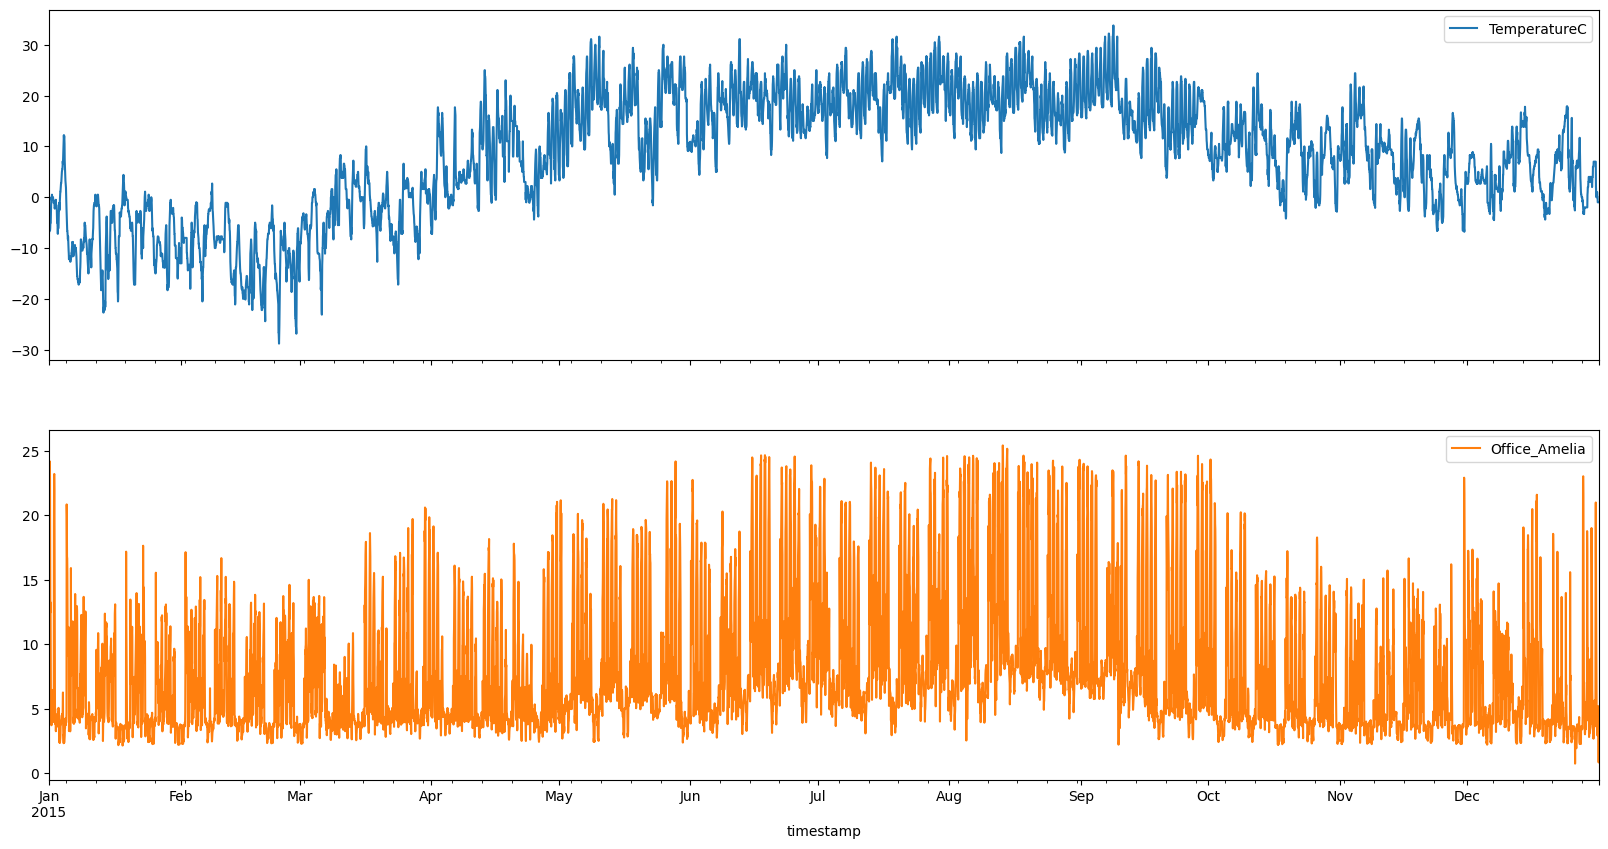

In [99]:
merged.plot(figsize=(20, 10), subplots=True);

### Analyze the weather influence on energy consumption

<Axes: xlabel='TemperatureC', ylabel='Office_Amelia'>

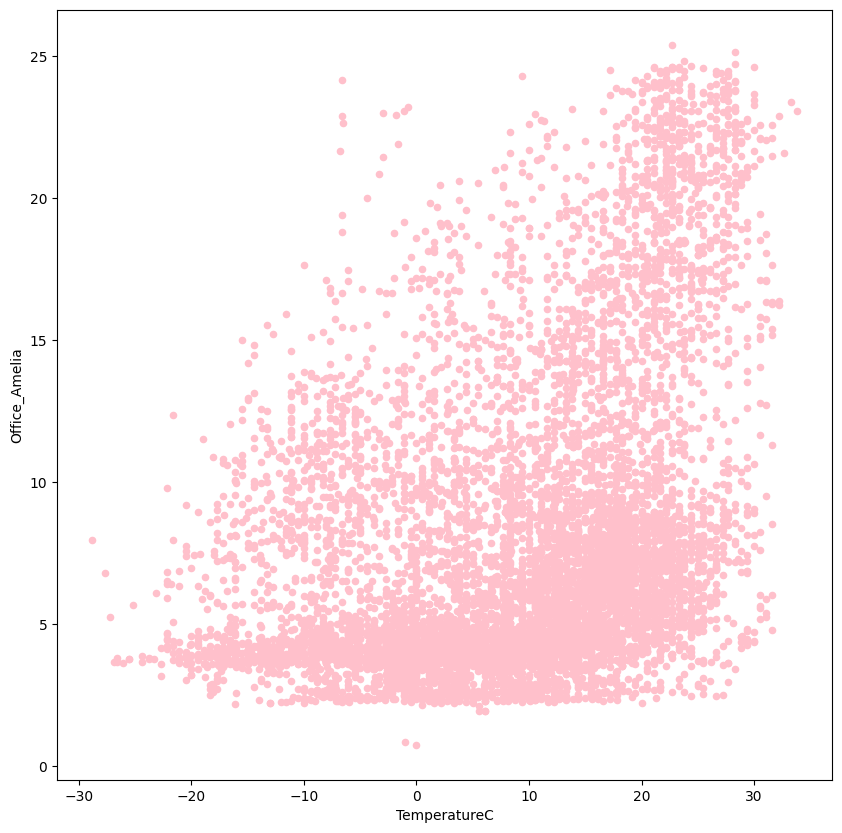

In [100]:
merged.plot(kind='scatter', x='TemperatureC', y='Office_Amelia', figsize=(10,10), color='pink')

<Axes: xlabel='TemperatureC', ylabel='Office_Amelia'>

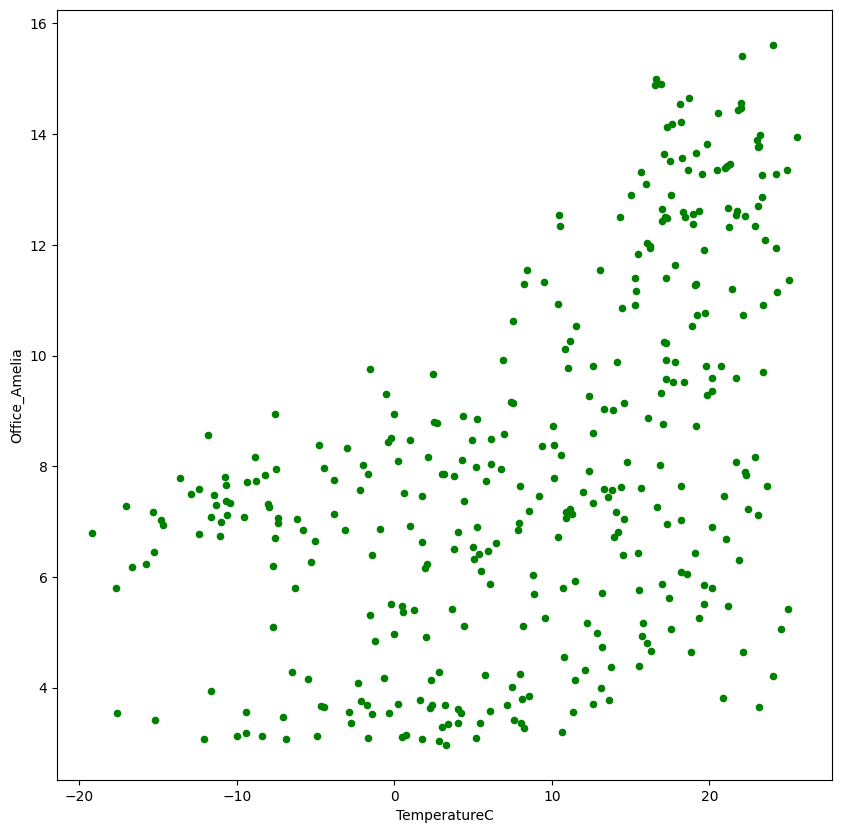

In [102]:
merged.resample("D").mean().plot(kind='scatter', x='TemperatureC', y='Office_Amelia', figsize=(10,10), color='green')

### Visualizations using Seaborn

In [103]:
def make_color_division(x):
    if x < 10:
        return "Heating"
    else:
        return "Cooling"

In [104]:
combined = merged.resample("D").mean()

In [105]:
combined.head()

,TemperatureC,Office_Amelia
timestamp,,
2015-01-01,-3.027083,8.323750
2015-01-02,-1.704167,7.865417
2015-01-03,-1.707639,3.695417
2015-01-04,7.135417,3.680417
2015-01-05,-7.598958,8.948333


In [106]:
combined['heating_vs_cooling'] = combined.TemperatureC.apply(lambda x: make_color_division(x))

In [107]:
combined.head()

,TemperatureC,Office_Amelia,heating_vs_cooling
timestamp,,,
2015-01-01,-3.027083,8.323750,Heating
2015-01-02,-1.704167,7.865417,Heating
2015-01-03,-1.707639,3.695417,Heating
2015-01-04,7.135417,3.680417,Heating
2015-01-05,-7.598958,8.948333,Heating


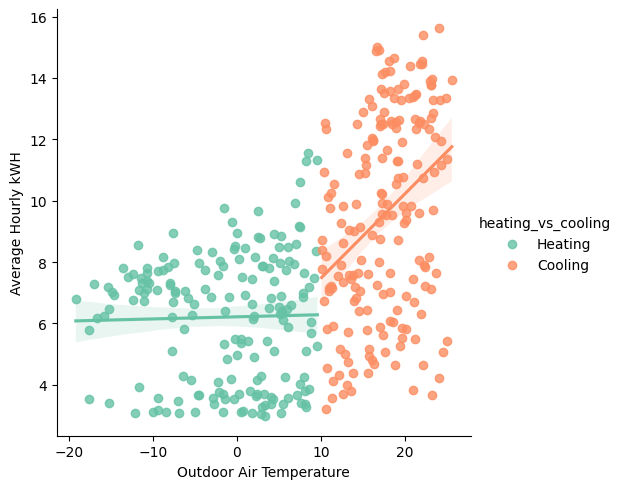

In [109]:
g = sns.lmplot(x="TemperatureC", y="Office_Amelia", hue="heating_vs_cooling",
               truncate=True, data=combined, palette='Set2')

g.set_axis_labels("Outdoor Air Temperature", "Average Hourly kWH")